<a href="https://colab.research.google.com/github/arifuddinatif/Quantitative-Analysis-and-Modeling-for-SP-500/blob/main/S%26P_500_project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# mounting drive

from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# importing libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import datetime as dt


In [ ]:
# reading the data

df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/S&P 500/cs-1 data set.csv')

# Exploratory data analysis

In [ ]:
# head of the data

df.head()

,date,open,high,low,close,volume,Name
0,2/8/2013,15.07,15.12,14.63,14.75,8407500,AAL
1,2/11/2013,14.89,15.01,14.26,14.46,8882000,AAL
2,2/12/2013,14.45,14.51,14.10,14.27,8126000,AAL
3,2/13/2013,14.30,14.94,14.25,14.66,10259500,AAL
4,2/14/2013,14.94,14.96,13.16,13.99,31879900,AAL


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 619040 entries, 0 to 619039
Data columns (total 7 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   date    619040 non-null  object 
 1   open    619029 non-null  float64
 2   high    619032 non-null  float64
 3   low     619032 non-null  float64
 4   close   619040 non-null  float64
 5   volume  619040 non-null  int64  
 6   Name    619040 non-null  object 
dtypes: float64(4), int64(1), object(2)
memory usage: 33.1+ MB


In [ ]:
df.describe() 

,open,high,low,close,volume
count,619040.000000,619040.000000,619040.000000,619040.000000,6.190400e+05
mean,83.023334,83.778311,82.256096,83.043763,4.321823e+06
std,97.377904,98.206884,96.506797,97.389748,8.693610e+06
min,1.620000,1.690000,1.500000,1.590000,0.000000e+00
25%,40.220000,40.620000,39.830000,40.245000,1.070320e+06
50%,62.590000,63.150000,62.020000,62.620000,2.082094e+06
75%,94.370000,95.180000,93.535375,94.410000,4.284509e+06
max,2044.000000,2067.990000,2035.110000,2049.000000,6.182376e+08


In [ ]:
df.isnull().sum()

date       0
open      11
high       8
low        8
close      0
volume     0
Name       0
dtype: int64

In [ ]:
# replacing null values with mean of the variables

df['open'] = df['open'].fillna(df['open'].mean())
df['high'] = df['high'].fillna(df['high'].mean())
df['low'] = df['low'].fillna(df['low'].mean())

In [ ]:
type(df['date'][0])

str

In [ ]:
# changing 'date' column to datetime format

df['date'] = pd.to_datetime(df['date'], errors ='coerce')

In [ ]:
df['Name'].nunique()

505

In [ ]:
# extracted these companies while finding correlated stocks which are the same companies with different tickers, hence removing them

df = df[df.Name != 'GOOGL']
df = df[df.Name != 'FOXA']
df = df[df.Name != 'NWSA']
df = df[df.Name != 'DISCK']
df = df[df.Name != 'UAA']

##EDA on AAPL stock

In [ ]:
# getting AAPL stock data

ticker_AAPL = df[df['Name'] == 'AAPL']

In [ ]:
ticker_AAPL.head()

,date,open,high,low,close,volume,Name
1259,2013-02-08,67.7142,68.4014,66.8928,67.8542,158168416,AAPL
1260,2013-02-11,68.0714,69.2771,67.6071,68.5614,129029425,AAPL
1261,2013-02-12,68.5014,68.9114,66.8205,66.8428,151829363,AAPL
1262,2013-02-13,66.7442,67.6628,66.1742,66.7156,118721995,AAPL
1263,2013-02-14,66.3599,67.3771,66.2885,66.6556,88809154,AAPL


In [ ]:
ticker_AAPL.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1259 entries, 1259 to 2517
Data columns (total 13 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   date        1259 non-null   datetime64[ns]
 1   open        1259 non-null   float64       
 2   high        1259 non-null   float64       
 3   low         1259 non-null   float64       
 4   close       1259 non-null   float64       
 5   volume      1259 non-null   int64         
 6   Name        1259 non-null   object        
 7   open-high   1259 non-null   float64       
 8   open-low    1259 non-null   float64       
 9   close-high  1259 non-null   float64       
 10  close-low   1259 non-null   float64       
 11  high-low    1259 non-null   float64       
 12  open-close  1259 non-null   float64       
dtypes: datetime64[ns](1), float64(10), int64(1), object(1)
memory usage: 177.7+ KB


(array([734503., 734869., 735234., 735599., 735964., 736330., 736695.]),
 <a list of 7 Text major ticklabel objects>)

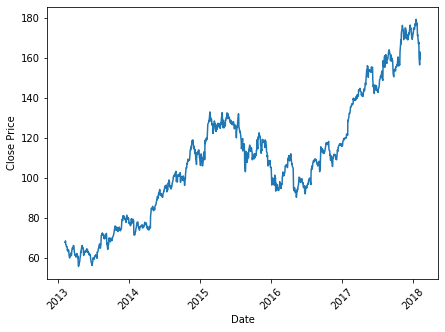

In [ ]:
# yearly closing price of AAPL stock

plt.figure(figsize=(7,5))
plt.plot('date','close',data=ticker_AAPL)
plt.xlabel('Date')
plt.ylabel('Close Price')
plt.xticks(rotation=45)

You can see from above that the AAPL stock has been in and up trend since 2013. There was a down trend from 2015 to 2016 but it again picked up.

In [ ]:
# ‘Daily Lag’ column is created to calculate the daily returns
# Daily returns tells us the returns that we obtain in a day after the stock price closes 

ticker_AAPL['Daily Lag'] = ticker_AAPL['close'].shift(1)
ticker_AAPL['Daily Returns'] = (ticker_AAPL['Daily Lag']/ticker_AAPL['close']) -1

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """


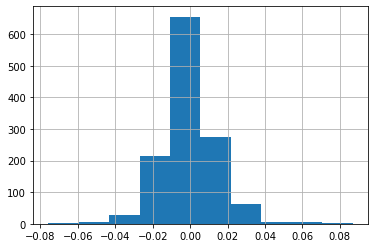

In [ ]:
# distribution of daily returns 

ticker_AAPL['Daily Returns'].hist()

In [ ]:
# mean and standard deviation of the daily returns

mean = ticker_AAPL['Daily Returns'].mean()
std = ticker_AAPL['Daily Returns'].std()
print('mean =',mean)
print('Std deviation =',std)

mean = -0.0005730241661765649
Std deviation = 0.014597555435835427


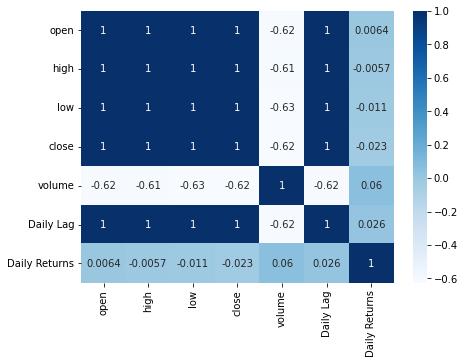

In [ ]:
# correlation heatmap

import seaborn as sns
plt.figure(figsize=(7,5))
sns.heatmap(ticker_AAPL.corr(),cmap='Blues',annot=True)

Above correlation map is not much clear, hence creating related columns to better understand the correlations.

In [ ]:
ticker_AAPL['open-high'] = ticker_AAPL['open']-ticker_AAPL['high']
ticker_AAPL['open-low'] = ticker_AAPL['open'] - ticker_AAPL['low']
ticker_AAPL['close-high'] = ticker_AAPL['close']-ticker_AAPL['high']
ticker_AAPL['close-low'] = ticker_AAPL['close'] - ticker_AAPL['low']
ticker_AAPL['high-low'] = ticker_AAPL['high'] - ticker_AAPL['low']
ticker_AAPL['open-close'] = ticker_AAPL['open'] - ticker_AAPL['close']
ticker_AAPL.head()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documen

,date,open,high,low,close,volume,Name,Daily Lag,Daily Returns,open-high,open-low,close-high,close-low,high-low,open-close
1259,2013-02-08,67.7142,68.4014,66.8928,67.8542,158168416,AAPL,NaN,NaN,-0.6872,0.8214,-0.5472,0.9614,1.5086,-0.1400
1260,2013-02-11,68.0714,69.2771,67.6071,68.5614,129029425,AAPL,67.8542,-0.010315,-1.2057,0.4643,-0.7157,0.9543,1.6700,-0.4900
1261,2013-02-12,68.5014,68.9114,66.8205,66.8428,151829363,AAPL,68.5614,0.025711,-0.4100,1.6809,-2.0686,0.0223,2.0909,1.6586
1262,2013-02-13,66.7442,67.6628,66.1742,66.7156,118721995,AAPL,66.8428,0.001907,-0.9186,0.5700,-0.9472,0.5414,1.4886,0.0286
1263,2013-02-14,66.3599,67.3771,66.2885,66.6556,88809154,AAPL,66.7156,0.000900,-1.0172,0.0714,-0.7215,0.3671,1.0886,-0.2957


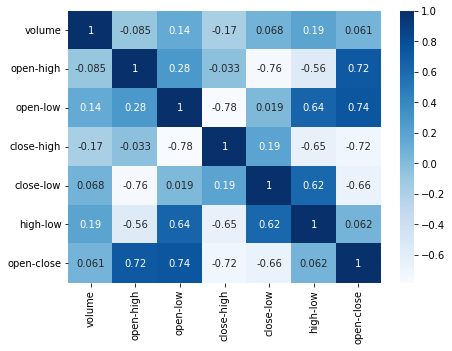

In [ ]:
ticker_AAPL_2 = ticker_AAPL.copy()
ticker_AAPL_2 = ticker_AAPL_2.drop(['open','high','low','close','Daily Lag','Daily Returns'],axis=1)
plt.figure(figsize=(7,5))
sns.heatmap(ticker_AAPL_2.corr(),cmap='Blues',annot=True)

Above heatmap tells us that open-close and open-high are highly correlated, open-close and open-low as well

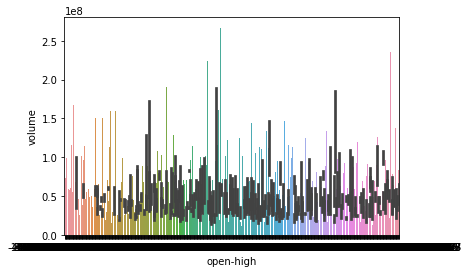

In [ ]:
#  bar plot on open-high and volume

sns.barplot(data = ticker_AAPL, x = "open-high", y= "volume")

# Weekly Volatility - method 1

In [ ]:
# removing the first data point as it is the only trading day of that week

df = df[1:]
df = df.reset_index(drop=True)

In [ ]:
# extracting the week and year of each date and adding to the dataset

import datetime as dt
df['date'].astype('int64').dtypes
df['week number'] = df['date'].dt.week
df['year'] = df['date'].dt.year

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: FutureWarning: Series.dt.weekofyear and Series.dt.week have been deprecated.  Please use Series.dt.isocalendar().week instead.
  """


In [ ]:
# creating another dataframe which is sorted by 'week number','year','date' columns

DF = df.sort_values(['week number','year','date']).reset_index(drop=True)

In [ ]:
DF.head()

,date,open,high,low,close,volume,Name,week number,year
0,2013-12-30,24.8700,25.2500,24.6500,24.7800,8841369,AAL,1,2013
1,2013-12-30,79.6371,80.0128,78.9029,79.2171,63407722,AAPL,1,2013
2,2013-12-30,110.3400,110.5800,108.7600,109.6300,479664,AAP,1,2013
3,2013-12-30,52.7300,53.0300,52.6000,53.0100,2898886,ABBV,1,2013
4,2013-12-30,70.2500,70.5200,70.0100,70.3800,642199,ABC,1,2013


In [ ]:
''' grouping the sorted dataframe by 'Name','week number','year' and extracting opening price of first day
  of the week and closing price of the last day of the week '''
  
Grouped_DF = DF.groupby(by=['Name','week number','year'])['open','close'].agg(['first','last'])
                                 

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  after removing the cwd from sys.path.


In [ ]:
Grouped_DF = Grouped_DF.reset_index(drop=False)

In [ ]:
Grouped_DF.head()

Name week number  year   open         close       
                          first   last  first   last
0    A           1  2013  57.05  57.45  57.32  57.19
1    A           1  2014  57.10  41.39  56.21  40.94
2    A           1  2015  41.18  41.18  40.56  40.56
3    A           1  2016  41.06  39.22  40.69  38.59
4    A           1  2017  45.93  46.63  46.49  47.99

In [ ]:
''' creating volatility column by taking the opening price of first day
  of the week and closing price of the last day of the week '''

Grouped_DF['open-first'] = Grouped_DF['open']['first']
Grouped_DF['close-last'] = Grouped_DF['close']['last']
Grouped_DF['difference'] = abs(Grouped_DF['close-last']-Grouped_DF['open-first'])
Grouped_DF['volatility'] = Grouped_DF['difference']/Grouped_DF['open-first']

In [ ]:
volatility_df = Grouped_DF.loc[:,['Name','week number','year','volatility']]

In [ ]:
# extracting weekly volatilities

volatility_df.head()

,Name,week number,year,volatility
,,,,
0,A,1,2013,0.002454
1,A,1,2014,0.283012
2,A,1,2015,0.015056
3,A,1,2016,0.060156
4,A,1,2017,0.044851


In [ ]:
# creating a function to extract the 10 most , 10 least volatile stocks in a given date range

def weekly_vola(start_date,end_date):

  # getting the week number and year for the given start date
  start_date = start_date.split('-')
  start_week_number = dt.date(int(start_date[0]), int(start_date[1]), int(start_date[2])).isocalendar()[1]
  start_year = dt.date(int(start_date[0]), int(start_date[1]), int(start_date[2])).isocalendar()[0]

  # getting the week number and year for the given end date
  end_date = end_date.split('-')
  end_week_number = dt.date(int(end_date[0]), int(end_date[1]), int(end_date[2])).isocalendar()[1]
  end_year = dt.date(int(end_date[0]), int(end_date[1]), int(end_date[2])).isocalendar()[0]

  # getting weekly volatilities according to the given date range and sorting them
  weekly_vols = volatility_df[((volatility_df['week number'] <= end_week_number) & (volatility_df['week number'] >= start_week_number)) & ((volatility_df['year'] <= end_year) & (volatility_df['year'] >= start_year))]
  weekly_vols = weekly_vols.sort_values(['volatility'],ascending = False).reset_index(drop=True)
  
  # getting top 10 and 10 least volatile stocks for the given date range
  return print(f'top 10 most volatile stocks in the given date range are \n\n {weekly_vols.head(10)} \n\n least 10 volatile stocks in the given date range are \n\n {weekly_vols.tail(10)}')



In [ ]:
# testing with different dates

weekly_vola('2017-2-20','2017-7-5')

top 10 most volatile stocks in the given date range are 

    Name week number  year volatility
                                    
0  BHGE          27  2017   0.310727
1    KR          24  2017   0.272757
2   AMD          18  2017   0.241251
3  NVDA          19  2017   0.225704
4  VRTX          13  2017   0.224798
5   AMD          25  2017   0.218401
6    FL          20  2017   0.215917
7  ORLY          27  2017   0.209792
8     M          19  2017   0.190051
9   SYF          17  2017   0.189504 

 least 10 volatile stocks in the given date range are 

       Name week number  year volatility
                                       
9905   AEE          14  2017        0.0
9906  NDAQ          20  2017        0.0
9907  ADSK          15  2017        0.0
9908   UTX          27  2017        0.0
9909   DGX          14  2017        0.0
9910  PBCT          22  2017        0.0
9911   MON          27  2017        0.0
9912   ADM          22  2017        0.0
9913   JCI          23  2017        0.

#Weekly Volatility - method 2

In [ ]:
# function to extract weekly volatilities 

def weekly_volatility(stock_ticker,start_date,end_date):

  stock_df = df[(df['Name'] == stock_ticker) & (df['date'].between(start_date,end_date))]
  stock_df['returns'] = stock_df['close']/stock_df['close'].shift()
  volatility = stock_df['returns'].std()*5**0.5
  volatility = round(volatility, 3)*100
  return volatility

## working on my logic

In [ ]:
# getting unique ticker names

all_tickers = list(df['Name'].unique())

In [ ]:
# creating a dataframe with all ticker names

tickers_df = pd.DataFrame(all_tickers) 

In [ ]:
# renaming the column

tickers_df.rename(columns = {0:'stock name'},inplace = True)

In [ ]:
tickers_df.head()

,stock name
0,AAL
1,AAPL
2,AAP
3,ABBV
4,ABC


In [ ]:
# getting all volatilities for a given date range using the weekly_volatility function

all_volatilities = []
for i in all_tickers:
  all_volatilities.append(weekly_volatility(i,'2013-02-08','2015-02-07'))

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [ ]:
# adding 'volatility' column to the tickers_df

tickers_df['volatility'] = all_volatilities

In [ ]:
# sorting with volatility values

tickers_df.sort_values('volatility',ascending = False,inplace=True)

In [ ]:
# resetting index of tickers_df

tickers_df.reset_index(inplace=True)

In [ ]:
# dropping 'index' column

tickers_df.drop(columns = ['index'],axis=1,inplace = True)

In [ ]:
# dropping null values from tickers_df

tickers_df.dropna(how='any',axis=0,inplace = True)

In [ ]:
# getting top 10 volatilities 

tickers_df.head(10)

,0,volatility
0,VRTX,8.9
1,INCY,7.1
2,AMD,6.7
3,NFLX,6.5
4,BBY,6.3
5,DISCA,6.1
6,QRVO,5.9
7,NFX,5.8
8,UAL,5.8
9,FB,5.7


In [ ]:
# getting least 10 volatilities

tickers_df.tail(10)

,0,volatility
474,BRK.B,2.0
475,CB,2.0
476,SO,2.0
477,PG,2.0
478,SRCL,1.9
479,WM,1.9
480,PEP,1.9
481,WMT,1.9
482,RSG,1.9
483,MCD,1.8


## Main function

In [ ]:
# function to extract most and least volatile stocks in the given date range

def most_and_least_volatile_stocks(start_date,end_date):

  # getting unique ticker names
  all_tickers = list(df['Name'].unique())

  # getting all volatilities for a given date range using the weekly_volatility function
  all_volatilities = []
  for i in all_tickers:
    all_volatilities.append(weekly_volatility(i,start_date,end_date))

  # creating a dataframe with all ticker names and their volatilities and sorting them
  tickers_df = pd.DataFrame(all_tickers) 
  tickers_df.rename(columns = {0:'stock name'},inplace = True)
  tickers_df['volatility'] = all_volatilities
  tickers_df.sort_values('volatility',ascending = False,inplace=True)
  tickers_df.reset_index(inplace=True)
  tickers_df.drop(columns = ['index'],axis=1,inplace = True)
  tickers_df.dropna(how='any',axis=0,inplace = True)

  # getting top 10 and least 10 volatilities
  return print(f'Top 10 volatile stocks : \n\n {tickers_df.head(10)} \n\n Least volatile stocks : \n\n {tickers_df.tail(10)}')

In [ ]:
# testing with different date ranges

most_and_least_volatile_stocks('2016-2-20','2018-7-5')

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


Top 10 volatile stocks : 

   stock name  volatility
0        LNT        11.5
1        CHK        10.7
2        AMD        10.0
3        MRO         8.0
4       BHGE         7.9
5        FCX         7.6
6        NWL         7.1
7        STX         6.6
8        RRC         6.5
9       EVHC         6.4 

 Least volatile stocks : 

     stock name  volatility
490        MMM         1.9
491        APH         1.9
492        ALL         1.9
493      BRK.B         1.9
494        JNJ         1.8
495        RSG         1.8
496         PG         1.8
497        PEP         1.7
498         WM         1.7
499         KO         1.7


#Pair trading

## working on my logic

In [ ]:
df.head()

,date,open,high,low,close,volume,Name,week number,year
0,2013-02-11,14.89,15.01,14.26,14.46,8882000,AAL,7,2013
1,2013-02-12,14.45,14.51,14.10,14.27,8126000,AAL,7,2013
2,2013-02-13,14.30,14.94,14.25,14.66,10259500,AAL,7,2013
3,2013-02-14,14.94,14.96,13.16,13.99,31879900,AAL,7,2013
4,2013-02-15,13.93,14.61,13.93,14.50,15628000,AAL,7,2013


In [ ]:
# creating 'open-close' column

df['open-close'] = df['open'] - df['close']

In [ ]:
# grouping by 'date','Name' columns over 'open-close' column

df_2 = df.groupby(['date','Name'])['open-close'].sum().unstack()

In [ ]:
df_2.head()

Name,A,AAL,AAP,AAPL,ABBV,ABC,ABT,ACN,ADBE,ADI,ADM,ADP,ADS,ADSK,AEE,AEP,AES,AET,AFL,AGN,AIG,AIV,AIZ,AJG,AKAM,ALB,ALGN,ALK,ALL,ALLE,ALXN,AMAT,AMD,AME,AMG,AMGN,AMP,AMT,AMZN,ANDV,...,UTX,V,VAR,VFC,VIAB,VLO,VMC,VNO,VRSK,VRSN,VRTX,VTR,VZ,WAT,WBA,WDC,WEC,WFC,WHR,WLTW,WM,WMB,WMT,WRK,WU,WY,WYN,WYNN,XEC,XEL,XL,XLNX,XOM,XRAY,XRX,XYL,YUM,ZBH,ZION,ZTS
date,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2013-02-08,-0.01,NaN,-0.56,-0.1400,0.12,-0.37,-0.02,-0.30,-0.81,-0.98,0.09,-0.215,-0.20,-0.10,0.18,-0.02,0.05,-0.77,0.03,-0.19,-0.03,-1.17,-0.01,0.03,0.08,-0.88,-0.33,-0.340,-0.09,NaN,-0.55,-0.20,-0.010,-0.24,0.39,-1.16,-0.28,-1.30,-0.55,-1.40,...,0.01,-0.1000,0.77,0.2262,-0.13,-0.55,-0.57,-0.99,-0.25,-0.30,-0.16,-0.64,0.1600,-1.09,-0.160,-0.73,-0.07,-0.19,-0.32,NaN,-0.09,-0.16,-0.28,NaN,-0.01,-0.02,-0.29,-3.01,-0.46,-0.09,-0.21,-0.51,-0.11,-0.21,0.24,-0.08,-1.60,-0.83,-0.11,-0.74
2013-02-11,0.57,0.43,0.26,-0.4900,0.28,0.09,0.16,0.02,0.35,-0.09,-0.02,0.450,0.64,0.18,-0.19,-0.16,-0.14,0.14,0.10,0.47,-0.56,-0.35,0.02,0.00,0.25,-0.08,-0.47,0.010,-0.22,NaN,1.36,-0.10,-0.080,-0.14,0.85,0.56,-0.09,0.43,5.99,-0.11,...,0.46,0.3125,-0.07,0.0571,0.02,-0.10,0.32,-0.20,0.38,-0.33,0.78,-0.29,-0.0200,0.05,-0.030,-0.02,-0.07,-0.31,0.86,NaN,0.00,0.29,-0.15,NaN,0.41,0.06,0.36,2.78,-0.39,-0.11,-0.06,0.00,0.07,0.03,-0.04,-0.35,0.61,0.10,-0.07,-0.20
2013-02-12,0.19,0.18,-0.21,1.6586,0.35,-0.26,-0.03,-0.48,-0.34,-0.12,-0.59,-0.120,1.17,0.00,-0.32,-0.17,-0.08,0.81,0.61,0.95,0.87,-0.29,-1.90,0.08,-1.38,-0.25,0.05,-0.025,-0.42,NaN,2.13,0.01,-0.065,-0.31,0.14,0.46,-0.78,0.78,0.49,1.21,...,-0.18,0.0100,-0.30,-0.0476,-0.20,0.48,-0.55,-0.71,0.29,0.19,-0.08,-0.47,-0.0700,0.45,-0.040,0.29,-0.15,-0.18,-4.09,NaN,-0.16,-0.17,0.09,NaN,-0.17,-0.14,-0.02,0.90,-0.38,-0.02,-0.14,-0.23,-0.21,-0.05,0.20,-0.43,-0.17,0.21,-0.21,-0.34
2013-02-13,0.06,-0.36,-0.07,0.0286,0.15,0.10,-0.17,-0.24,0.09,0.03,-0.25,0.110,0.06,0.25,-0.08,-0.06,-0.03,0.75,0.78,-0.69,0.06,0.13,-0.33,-0.55,-0.49,-2.10,0.21,-0.320,-0.29,NaN,-1.89,0.00,0.060,-0.13,-0.48,0.02,-0.39,1.64,-7.94,-0.52,...,0.32,0.4200,0.14,0.0809,-0.18,-0.45,0.43,0.04,0.00,0.01,-0.46,0.16,0.0199,-0.86,0.120,-0.27,0.11,0.32,-0.10,NaN,-0.12,0.30,-0.10,NaN,-0.24,0.10,0.82,1.20,-0.59,0.07,-0.04,-0.17,-0.21,-0.19,-0.04,-0.26,0.36,-0.26,-0.16,0.25
2013-02-14,0.14,0.95,-0.18,-0.2957,-1.52,-0.10,-0.42,0.08,0.09,-0.52,-0.37,-0.490,-0.10,-0.13,0.06,-0.01,0.10,-0.23,-0.40,-0.26,-0.57,-0.15,-0.86,-0.39,-0.61,0.44,0.20,0.310,-0.20,NaN,6.89,-0.03,-0.010,-0.10,-1.19,1.28,-1.46,0.19,-1.87,-1.03,...,-0.46,-0.3450,0.26,-0.2214,-0.75,-0.93,0.59,0.17,0.20,-0.11,0.73,0.26,0.2200,-0.55,-0.565,-0.25,0.25,-0.19,-0.78,NaN,-1.15,0.13,0.28,NaN,0.20,-0.01,0.14,-0.40,0.17,-0.05,0.17,-0.83,-0.18,-0.02,-0.28,-0.25,0.38,-0.48,0.05,0.12


In [ ]:
# getting correlation dataframe of all tickers

df_2_corr = df_2.corr()

In [ ]:
df_2_corr.head()

Name,A,AAL,AAP,AAPL,ABBV,ABC,ABT,ACN,ADBE,ADI,ADM,ADP,ADS,ADSK,AEE,AEP,AES,AET,AFL,AGN,AIG,AIV,AIZ,AJG,AKAM,ALB,ALGN,ALK,ALL,ALLE,ALXN,AMAT,AMD,AME,AMG,AMGN,AMP,AMT,AMZN,ANDV,...,UTX,V,VAR,VFC,VIAB,VLO,VMC,VNO,VRSK,VRSN,VRTX,VTR,VZ,WAT,WBA,WDC,WEC,WFC,WHR,WLTW,WM,WMB,WMT,WRK,WU,WY,WYN,WYNN,XEC,XEL,XL,XLNX,XOM,XRAY,XRX,XYL,YUM,ZBH,ZION,ZTS
Name,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
A,1.000000,0.280146,0.196777,0.314767,0.363763,0.280659,0.452206,0.441986,0.425823,0.376221,0.250396,0.333012,0.348493,0.421947,0.126574,0.134818,0.278354,0.286311,0.337905,0.298816,0.402634,0.205363,0.285370,0.391126,0.372084,0.336277,0.374659,0.274368,0.295841,0.398692,0.357012,0.384271,0.190544,0.459474,0.448051,0.423591,0.439609,0.265872,0.351651,0.231218,...,0.421848,0.433165,0.436359,0.312610,0.300047,0.270168,0.304452,0.260090,0.300373,0.388262,0.333402,0.143290,0.219183,0.579189,0.315511,0.362114,0.111708,0.368299,0.307424,0.240324,0.278461,0.297721,0.209525,0.185862,0.336719,0.330350,0.369657,0.276686,0.270378,0.108784,0.199643,0.388272,0.316390,0.350542,0.342533,0.415264,0.354200,0.416285,0.338231,0.329611
AAL,0.280146,1.000000,0.191089,0.234416,0.161381,0.246914,0.225757,0.260084,0.223943,0.217220,0.222848,0.251612,0.336138,0.314086,0.055935,0.061828,0.143580,0.182434,0.189559,0.211839,0.269286,0.123927,0.191201,0.242592,0.245378,0.157445,0.117918,0.591104,0.185287,0.290768,0.244118,0.229869,0.134127,0.290809,0.253673,0.224869,0.333419,0.128702,0.236087,0.220095,...,0.277825,0.289937,0.190939,0.278908,0.199250,0.226400,0.221442,0.167641,0.188147,0.189414,0.188017,0.057482,0.159313,0.202286,0.223589,0.253328,0.029795,0.270420,0.274559,0.162762,0.141905,0.202948,0.181750,0.174356,0.205442,0.192095,0.337859,0.183309,0.077982,0.031473,0.216652,0.223436,0.139017,0.197514,0.224863,0.224849,0.238947,0.202447,0.251062,0.184954
AAP,0.196777,0.191089,1.000000,0.174146,0.215957,0.163752,0.231292,0.203969,0.160306,0.156650,0.212422,0.250141,0.260496,0.165099,0.124633,0.123562,0.159490,0.233768,0.226662,0.184545,0.253936,0.164845,0.224425,0.253665,0.230021,0.135775,0.064209,0.222252,0.222224,0.284441,0.163660,0.094745,-0.003129,0.302407,0.307013,0.219028,0.300508,0.118152,0.162029,0.184889,...,0.267495,0.222099,0.206466,0.322237,0.202925,0.204699,0.264707,0.252979,0.232447,0.168795,0.140920,0.140451,0.184019,0.199012,0.253735,0.159238,0.133114,0.286958,0.253801,0.145914,0.274760,0.208952,0.245382,0.122623,0.260811,0.201291,0.291743,0.119374,0.198503,0.112634,0.137213,0.155562,0.206490,0.181046,0.220704,0.238168,0.281859,0.197020,0.242057,0.155551
AAPL,0.314767,0.234416,0.174146,1.000000,0.189141,0.202145,0.277885,0.359118,0.413162,0.405633,0.218513,0.245277,0.260416,0.352726,0.098850,0.125647,0.204736,0.187468,0.250568,0.192085,0.297645,0.115418,0.216965,0.235641,0.303653,0.230296,0.254560,0.238167,0.241968,0.264539,0.251105,0.420002,0.230396,0.328976,0.289437,0.259518,0.308547,0.221974,0.427421,0.268613,...,0.324116,0.427857,0.283668,0.220241,0.191654,0.249438,0.206886,0.133103,0.207521,0.311972,0.250549,0.115111,0.207864,0.258999,0.276891,0.353313,0.084029,0.302470,0.219550,0.147490,0.222026,0.274185,0.203838,0.149381,0.269585,0.216289,0.307600,0.207292,0.222057,0.096693,0.148530,0.379474,0.236117,0.229906,0.258793,0.240732,0.281479,0.276585,0.224145,0.229607
ABBV,0.363763,0.161381,0.215957,0.189141,1.000000,0.325276,0.413041,0.282351,0.281089,0.220769,0.214285,0.216368,0.224390,0.218562,0.143465,0.126273,0.178281,0.290342,0.262440,0.367074,0.276995,0.172614,0.187049,0.344111,0.239861,0.166646,0.225620,0.220964,0.229352,0.197370,0.372212,0.203531,0.075286,0.275274,0.282786,0.492426,0.279132,0.136078,0.204043,0.208801,...,0.247036,0.320290,0.313087,0.221765,0.164441,0.219969,0.211871,0.182592,0.196278,0.194520,0.306777,0.129672,0.178130,0.341644,0.282583,0.219941,0.105003,0.239012,0.197320,0.202667,0.207204,0.246849,0.225567,0.104541,0.204077,0.178684,0.230983,0.119099,0.120596,0.120735,0.149462,0.205825,0.22

## Main function

In [ ]:
# function to extract top 5 pairs for a given year

def top_5_pairs(year):

  # getting the correlated data for the given year and unstacking them
  df['year'] = pd.DatetimeIndex(df['date']).year
  df_2 = df[df['year'] == year]
  df['open-close'] = df['open'] - df['close']
  df_2 = df_2.groupby(['date','Name'])['open-close'].mean().unstack()
  df_2_corr = df_2.corr()

  # getting pairs of tickers with their correlation 
  paired_df = df_2_corr.unstack()
  sorted_pairs = paired_df.sort_values(kind="quicksort")
  sorted_pairs = pd.DataFrame(sorted_pairs)
  sorted_pairs.rename(columns = {0:'corr'},inplace = True)
  sorted_pairs.sort_values('corr',ascending = False,inplace=True)

  # getting top 5 pairs 
  return sorted_pairs[510:520:2]

In [ ]:
# experimenting with year values

top_5_pairs(2016)

,,corr
Name,Name,
XEL,SCG,0.871434
WEC,SCG,0.871377
SCG,PNW,0.870839
DTE,WEC,0.870537
WEC,DUK,0.869805


In [ ]:
top_5_pairs(2018)

corr
Name Name          
KLAC AMAT  0.923191
COF  AXP   0.922124
MA   MSFT  0.921595
C    BAC   0.921042
     AXP   0.914858

# Binary classification

## working on my model

In [ ]:
df.head()

,date,open,high,low,close,volume,Name,week number,year,open-close
0,2013-02-11,14.89,15.01,14.26,14.46,8882000,AAL,7,2013,0.43
1,2013-02-12,14.45,14.51,14.10,14.27,8126000,AAL,7,2013,0.18
2,2013-02-13,14.30,14.94,14.25,14.66,10259500,AAL,7,2013,-0.36
3,2013-02-14,14.94,14.96,13.16,13.99,31879900,AAL,7,2013,0.95
4,2013-02-15,13.93,14.61,13.93,14.50,15628000,AAL,7,2013,-0.57


In [ ]:
# creating independent and dependent variables

y = np.where(df['close'] > df['open'],1,-1)

df['open-close'] = df.open - df.close
df['high-low'] = df.high - df.low
x = df[['open-close','high-low','volume']]

In [ ]:
# splitting the data into train and test sets

from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 0)

In [ ]:
# scaling the dependent variables

from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
scaler = MinMaxScaler()
x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn import metrics

In [ ]:
# training the model

model = LogisticRegression()
model = model.fit (x_train,y_train)

In [ ]:
# getting predictions

probability = model.predict_proba(x_test)
print(probability)

predicted = model.predict(x_test)

[[0.41817782 0.58182218]
 [0.50189597 0.49810403]
 [0.85675283 0.14324717]
 ...
 [0.54411882 0.45588118]
 [0.47003909 0.52996091]
 [0.46765611 0.53234389]]


In [ ]:
predicted

array([ 1, -1, -1, ..., -1,  1,  1])

In [ ]:
from sklearn.metrics import confusion_matrix

In [ ]:
print(metrics.confusion_matrix(y_test, predicted))

[[44680 14599]
 [  196 63110]]


[Text(0, 0.5, 'Red'), Text(0, 1.5, 'Green')]

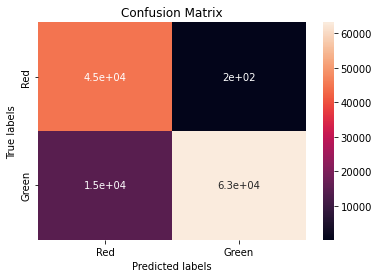

In [ ]:
# confusion matrix for our predictions

cm_test = confusion_matrix(predicted,y_test)
ax= plt.subplot()
sns.heatmap(cm_test, annot=True, ax = ax) #annot=True to annotate cells
labels = ['Red', 'Green']
# labels, title and ticks
ax.set_xlabel('Predicted labels')
ax.set_ylabel('True labels')
ax.set_title('Confusion Matrix')
ax.xaxis.set_ticklabels(labels)
ax.yaxis.set_ticklabels(labels)

In [ ]:
# getting classification report

print(metrics.classification_report(y_test, predicted))

              precision    recall  f1-score   support

          -1       1.00      0.75      0.86     59279
           1       0.81      1.00      0.90     63306

    accuracy                           0.88    122585
   macro avg       0.90      0.88      0.88    122585
weighted avg       0.90      0.88      0.88    122585



In [ ]:
# model score

print(model.score(x_test,y_test))

0.879308235102174


## Main function

In [ ]:
# function to predict weather closing price is greater than opening price or not

def price_classifier(ticker,date):

  try:
    # creating the date variable and getting the data uptill the given date
    time_stamp = pd.to_datetime(date)
    time_stamp = str(time_stamp-dt.timedelta(1))
    time_stamp = time_stamp.split(' ')
    stock_df = df[df['date'].between('2013-02-11',time_stamp[0])]
    
    # creating independent and dependent variables
    y = np.where(stock_df['close'] > stock_df['open'],1,-1)
    stock_df['open-close'] = stock_df.open - stock_df.close
    stock_df['high-low'] = stock_df.high - stock_df.low
    x = stock_df[['open-close','high-low']]

    # training model
    model = LogisticRegression()
    model = model.fit(x,y)

    # getting test data from the dataset
    x_test = df[(df['date'] == date) & (df['Name'] == ticker)]
    x_test = x_test[['open-close','high-low']]
    prediction = model.predict(x_test)

    # getting prediction
    return print(prediction)

  except:
    print('Not A trading day')    


In [ ]:
# testing with different tickers and names

price_classifier('ABBV','2015-04-28')

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if sys.path[0] == '':
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  del sys.path[0]


[1]
